# Numpy


NumPy (short for Numerical Python) provides an efficient interface to store and operate on dense data buffers. 
- In some ways, NumPy arrays are like Python’s built-in list type, but NumPy arrays provide much more efficient storage and data operations as the arrays grow larger in size.
- NumPy arrays form the core of nearly the entire ecosystem of data science tools in Python

First, install `numpy` and load it. I checked my version of `numpy` and upgraded it since it's outdated.

In [33]:
# %%cmd
# jupyter nbconvert --to slides Numpy.ipynb

In [5]:
import numpy as np
np.__version__

'1.24.1'

In [4]:
# %%cmd
# pip list --outdated

In [ ]:
# %%cmd
# pip install --upgrade numpy

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Built-In Documentation
- Display all the contents of the numpy namespace: `np.<TAB>`

- Display NumPy's built-in documentation: `np?`

- More detailed documentation, tutorials and other resources, go to http://www.numpy.org.

## Concepts of Array
An array is a grid of values. It contains the information of the raw data, such as:
- How to locate an element
- How to interpret an element

### Data Types in Python

- The standard Python implementation is written in C. 
    - Every Python object is simply a cleverly disguised C structure, which contains not only its value, but other information as well.

- This extra information in the Python integer structure is what allows Python to be coded so freely and dynamically. Of course, it comes with cost. 

- There is some overhead in storing an integer in Python as compared to an integer in a compiled language like C. 


For example, when you create an integer `x = 1` in Python, x is not jsut a "raw" integer. 

A single integer in Python (e.g., version 3.4) contains 4 pieces:
1. `ob_refcnt`, a reference count that helps Python silently handle memory allocation and deallocation
2. `ob_type`, encodes the type of the variable
3. `ob_size`, specifies the size of the following data members
4. `ob_digit`, contains the actual integer value that we expect the Python variable to represent

<br><br>
<center><img src="images/Numpy_1.JPG" width = "500"></center>
<center>Difference between C and Python integers (Ref. Python Data Science Handbook)</center>

### Dynamic-type list & fixed-type array (NumPy-style)

There are various differences between list and Numpy array.

1. The array contains a single pointer to one contiguous block of data. 

2. The Python list, contains a pointer to a block of pointers, each of which in turn points to full Python object like the Python integer. 

Then, why would we prefer one towards the other?

1. The advantage of list is flexibility: because each list element is a full structure containing both data and type information, the list can be filled with data of any desired type

2. Fixed-type NumPy-style arrays lack this flexibility, but are much more efficient for storing and manipulating data.


<center><img src="images/Numpy_4.JPG" width = "600"></center>
<center>Difference between C and Python integers (Ref. Python Data Science Handbook)</center>

![Numpy4](images/Numpy_4.jpg)
*Difference between C and Python lists (Ref. Python Data Science Handbook p.38)*

**Note**: it's important to know about the basic data structure in Python: list, dictionary, etc. If you forget, please go to this tutorial to review: [Summary of List in Python](https://github.com/YuxiaoLuo/Intro_Python/blob/main/Week12/12_Lists.ipynb).

In [68]:
# we can use list to hold multiple items in Python
L = list(range(10))
L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [69]:
# convert each element to string
L2 = [str(c) for c in L]
L2

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [72]:
# list can store different types
L3 = [True, "2", 3.0, 4]
[type(element) for element in L3]

[bool, str, float, int]

Python offers a built-in `array` module (available since Python 3.3) to create dense arrays of a uniform type. But it's less useful than the `Numpy` array. In the example below, `'i'` is type code indicating the contents are integers.

In [7]:
import array

# create a list from 1 to 10
L = list(range(1,11))
print(L)

# create an array
A = array.array('i', L)
print(A)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
array('i', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])


In [4]:
# use Help document to learn about the object
array.array?

## NumPy Arrays
#### Overview
- Support vectorized operations, while lists don't
- In the context of high-level languages like Python, Matlab, and R, the term vectorization describes the use of optimized, pre-compiled code written in a low-level language (e.g. C) to perform mathematical operations over a sequence of data
- cannot be changed in size -- have to create a new array or overwrite existing one

- each has one and only one dtype - all items in each array are of that same dtype
- an equivalent numpy array occupies much less space than a python list
- http://www.numpy.org

### Creating array from Python lists

Create an array: `array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0, like=None)`

In [12]:
np.array?

In [171]:
# create arrays from Python lists
x = np.array([1, 4, 2, 5, 3])

type(x)

# NumPy is constrained to arrays containing the same type 
# integers are upcast to floating point 
np.array([3.14, 4, 2, 3])

numpy.ndarray

array([3.14, 4.  , 2.  , 3.  ])

In [172]:
# set the data type: use dtype keyword
# https://numpy.org/doc/stable/reference/arrays.dtypes.html 
np.array([1, 2, 3, 4], dtype = "float32")

array([1., 2., 3., 4.], dtype=float32)

In [176]:
# convert float to int
np.array([2.3, 3.9, 4.4], dtype = "int32")

array([2, 3, 4])

Create multidimensional arrays with list comprehension.

In [79]:
# nested lists result in multidimensional arrays
np.array([range(i, i+4) for i in [2, 4, 6]])

array([[2, 3, 4, 5],
       [4, 5, 6, 7],
       [6, 7, 8, 9]])

### Creating array from scratch
Numpy offers built-in routines to create arrays.

In [184]:
# length-10 integer array filled with zeros
np.zeros(10, dtype = int)

# 3x5 floating-point array filled with 1s
np.ones((3,5), dtype = float)

# 3x5 array filled with 3.14 
np.full((3,5), 3.14)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [190]:
# array filled with linear sequence 
# starting at 0, ending at 20, stepping by 2
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [193]:
# array of five values evenly spaced between 0 and 1
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [85]:
# 3x3 array of uniformly distributed 
# random values between 0 and 1
np.random.random((3,3))

array([[0.33739616, 0.64817187, 0.36824154],
       [0.95715516, 0.14035078, 0.87008726],
       [0.47360805, 0.80091075, 0.52047748]])

In [197]:
# 3x3 array of normally distributed random values 
# with mean 0 and standard deviation 1
np.random.normal(0, 1, (3,3))

array([[ 0.65252896, -1.18102944, -1.01489007],
       [-0.96732772,  1.37622696,  0.4215631 ],
       [ 1.10019023,  0.31640099,  0.93341229]])

In [88]:
# 3x3 array of random integers in the interval [0, 10)
np.random.randint(0, 10, (3,3))

array([[7, 9, 9],
       [3, 6, 7],
       [2, 0, 3]])

In [200]:
# 3x3 identity matrix
np.eye(6)

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

`np.empty()` can be used to create an array without initializing the entries of given shape and type

In [201]:
# uninitialized array of 3 integers 
# values will be whatever happens to already exist at that memory location
np.empty(5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [7]:
# See the function arguments
# help(np.random.normal)

In [29]:
# generate random integer in a one-dimensional array
np.arange(0, 10)
# generate random integer in a 3x3 array 
np.random.randint(1,10, (3,3))
# generate any array from uniform distrbution 
np.random.random((3,3))
# generate an 5x7 array from standardized normal distribution 
np.random.normal(0,1,(2,3))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([[5, 5, 4],
       [2, 9, 5],
       [8, 7, 1]])

array([[0.84252679, 0.9514802 , 0.67400671],
       [0.97085538, 0.97908065, 0.49635175],
       [0.95514056, 0.06642457, 0.38645033]])

array([[-1.63298311,  0.44241543,  0.87768993],
       [-0.20230854, -1.77739507, -1.25239649]])

### NumPy Standard Data Types

The standard NumPy data types are listed below. 
- When constructing an array, you can specify them using a string:
`np.zeros(10, dtype = 'int16')`
- Or using the associated NumPy object: 
`np.zeros(10, dtype = np.int16)`

<center><img src="images/Numpy_2.JPG" width = "500"></center>
<center>Figure.2 Standard NumPy data types</center>

## Numpy Arrays

Data manipulation in Python is nearly synonymous with NumPy array manipulation: even newer tools like Pandas (Next Tutorial) are built around the NumPy array. You really need to know them well.

### Basics Operations of Numpy arrays
- Attributes of arrays: determining the size, shape, memory consumption, and data types of arrays
- Indexing of arrays: getting and setting the value of individual array elements
- Slicing of arrays: getting and setting smaller subarrays within a larger array
- Reshaping of arrays: changing the shape of a given array
- Joining and splitting of arrays: combining multiple arrays into one, and splitting one array into many

#### NumPy array attributes
- define arrays in different dimensions
- use NumPy's random number generator and `seed()` to ensure each time the random arrays are the same

In [31]:
import numpy as np 
np.random.seed(2023) # seed for reproducibility

# 1-dim array: one bracket
x1 = np.random.randint(10, size = 6)

# 2-dim array: two brackets
x2 = np.random.randint(10, size = (3,4)) 

# 3- dim array: three brackets
x3 = np.random.randint(10, size = (3, 4, 5))

x1; x2; x3

array([7, 9, 6, 7, 1, 3])

array([[4, 4, 6, 5],
       [0, 6, 1, 5],
       [7, 5, 8, 2]])

array([[[3, 1, 0, 7, 1],
        [0, 0, 1, 8, 1],
        [2, 1, 0, 1, 5],
        [6, 4, 6, 8, 8]],

       [[4, 1, 7, 6, 5],
        [7, 4, 9, 2, 1],
        [0, 6, 4, 3, 3],
        [7, 2, 8, 6, 4]],

       [[2, 1, 5, 3, 3],
        [8, 5, 9, 5, 7],
        [3, 7, 6, 7, 9],
        [3, 3, 6, 5, 9]]])

Here are some information stored together in the array:

In [227]:
# number of dimensions
x3.ndim
# size of each dimension
x3.shape
# total size of the array
x3.size
# data type of the array
x3.dtype
# itemsize: size (in bytes) of each array element
x3.itemsize
# nbytes: total size (in bytes) of the array
x3.nbytes

3

(3, 4, 5)

60

dtype('int32')

4

240

You can also use `np.array()` to define whatever you want
1. Figure out differences of dimensions using `.shape` attribute.
2. Read this discussion thread on StackOverFLow about the topic: https://stackoverflow.com/questions/39694318/difference-between-single-and-double-bracket-numpy-array

In [143]:
np.array([0,0,0,0]).shape

np.array([[0,0,0,0]]).shape

np.array([[[0,0,0,0]]]).shape

(4,)

(1, 4)

(1, 1, 4)

#### Array indexing: accessing single elements
- In one-dimensional array, access the ith value using square brackets, like lists.
- In multidimensional array, access items using a comma-separated tuple of indices.
- NumPy arrays have fixed type. If you insert a floating-point vlaue to an integer array, the value will be sliently truncated.

In [34]:
x1
x1[4]
x1[-2]

array([7, 9, 6, 7, 1, 3])

1

1

In [42]:
print(x2)
x2[0,3]

[[4 4 6 5]
 [0 6 1 5]
 [7 5 8 2]]


5

In [35]:
# you can also modify values 
x2[0, 0] = 12
x2

array([7, 9, 6, 7, 1, 3])

1

1

Keep in mind that, unlike Python lists, NumPy arrays have a fixed type. This means,
for example, that if you attempt to insert a floating-point value to an integer array, the
value will be silently truncated.

In [44]:
print(x1)
x1[0] = 3.1415926
# floating will be truncated
x1

[7 9 6 7 1 3]


array([3, 9, 6, 7, 1, 3])

#### Array Slicing: accessing subarrays

- The NumPy slicing syntax is `x[start:stop:step]`. 
- If any of these are unspecified, they default to the values `start=0, stop=size of dimension, step=1`.

##### One-dimensional subarray

In [45]:
#syntax
#x[start:stop:step]

#one dimension array
x = np.arange(10)
print(x)

#find first five elements from array x
x[0:5]
x[:5]

#find a middle subarray 
x[3:7]

#find even numbers from x
x[0::2]

#find odd numbers from x
x[1::2]

[0 1 2 3 4 5 6 7 8 9]


array([0, 1, 2, 3, 4])

array([0, 1, 2, 3, 4])

array([3, 4, 5, 6])

array([0, 2, 4, 6, 8])

array([1, 3, 5, 7, 9])

##### Multidimensional subarrays

In [65]:
np.random.randint?

In [68]:
# reproduction
np.random.seed(0)
x = np.random.randint(low = 20, size=(4,3))
print(x)

[[12 15  0]
 [ 3  3  7]
 [ 9 19 18]
 [ 4  6 12]]


In [80]:
#find first two rows, three columns
x[:2]
x[:2,:3]
x[:2,:]

array([[12, 15,  0],
       [ 3,  3,  7]])

array([[12, 15,  0],
       [ 3,  3,  7]])

array([[12, 15,  0],
       [ 3,  3,  7]])

In [81]:
#second row

# slicing
x[1:2]

# indexing
x[1]

array([[3, 3, 7]])

array([3, 3, 7])

In [72]:
#first column
x[:, 0]

array([12,  3,  9,  4])

In [82]:
print(x)
#first two columns, 2nd and 4th rows
x[1::2, :2]

[[12 15  0]
 [ 3  3  7]
 [ 9 19 18]
 [ 4  6 12]]


array([[3, 3],
       [4, 6]])

###### Subarrays as no-copy views
One important—and extremely useful—thing to know about array slices:
- they return views rather than copies of the array data.
- This is one area in which NumPy array slicing differs from Python list slicing
- in lists, slices will be copies. 

Consider our two-dimensional array from before:

In [83]:
print(x)

[[12 15  0]
 [ 3  3  7]
 [ 9 19 18]
 [ 4  6 12]]


In [84]:
x_sub = x[:2, :2]
print(x_sub)

[[12 15]
 [ 3  3]]


Now if we modify this subarray, we’ll see that the original array is changed!

This default behavior is actually quite useful: it means that when we work with large
datasets, we can access and process pieces of these datasets without the need to copy
the underlying data buffer.

In [87]:
x_sub[0,0] = 99
print(x_sub)

[[99 15]
 [ 3  3]]


In [88]:
print(x)

[[99 15  0]
 [ 3  3  7]
 [ 9 19 18]
 [ 4  6 12]]


##### Creating copies of arrays
Despite the nice features of array views, it is sometimes useful to instead explicitly
copy the data within an array or a subarray. This can be most easily done with the
copy() method:

In [91]:
print(x)

[[99 15  0]
 [ 3  3  7]
 [ 9 19 18]
 [ 4  6 12]]


In [90]:
x_sub_copy = x[:2,:2].copy()
print(x_sub_copy)

[[99 15]
 [ 3  3]]


In [92]:
x_sub_copy[0,0] = 100
print(x_sub_copy)

[[100  15]
 [  3   3]]


In [93]:
# original array will not be modified
print(x)

[[99 15  0]
 [ 3  3  7]
 [ 9 19 18]
 [ 4  6 12]]


#### Reshaping, Concatenation, Splitting
- Reshaping: `reshape((x,y))`
<br><br>
- Concatenation: `np.concatenate`, `np.vstack` (vertical stack), and `np.hstack` (horizontal stack). 
    - `np.concatenate` takes a tuple or list of arrays as its first argument
<br><br>
- Splitting: `np.split`, `np.hsplit`, `np.vsplit`

##### Reshaping
Put the numbers 1 through 9 in a 3×3 grid. 

Note that for this to work, the size of the initial array must match the size of the
reshaped array.

In [733]:
grid = np.arange(1, 10).reshape((3,3))
grid

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

Another common reshaping pattern is the conversion of a one-dimensional array
into a two-dimensional row or column matrix.

In [142]:
x = np.array([1, 2, 3])
x

array([1, 2, 3])

In [143]:
# row vector
x.reshape((1,3))

array([[1, 2, 3]])

In [140]:
# column vector
x.reshape((3,1))

array([[1],
       [2],
       [3]])

In [16]:
# column vector via newaxis
x = np.array([1,2,3])
print(x)

x[:, np.newaxis]

[1 2 3]


array([[1],
       [2],
       [3]])

In [33]:
# row vector via newaxis
x = np.array([1,2,3])
print(x)

x[np.newaxis, :]

[1 2 3]


array([[1, 2, 3]])

##### Concatenation and Splitting
All of the preceding routines worked on single arrays. It’s also possible to combine
multiple arrays into one, and to conversely split a single array into multiple arrays.
We’ll take a look at those operations here.

In [144]:
# concatenate() works with same dimension array
x = np.array([1,2,3])
y = np.array([3,2,1])
x
y

np.concatenate([x, y])

array([1, 2, 3])

array([3, 2, 1])

array([1, 2, 3, 3, 2, 1])

In [145]:
# concatenate more than 2 arrays
# note z is list
z = [99, 99 ,99]
type(z)
a = np.concatenate([x,y,z])
a

list

array([ 1,  2,  3,  3,  2,  1, 99, 99, 99])

In [149]:
a.shape

(9,)

In [148]:
a.reshape((3,3))

array([[ 1,  2,  3],
       [ 3,  2,  1],
       [99, 99, 99]])

In [84]:
# concatenate 2-dimensional arrays
grid = np.array([[1, 2, 3],
                [4, 5, 6]])
grid

new_grid = np.concatenate([grid, grid])
new_grid
new_grid.shape

array([[1, 2, 3],
       [4, 5, 6]])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

(4, 3)

###### concatenate along the second axies (zero-indexed)

In [85]:
# axis = 0 is column-wise, which is default
# axis = 1 is row-wise
new_grid = np.concatenate([grid, grid], axis = 1)
new_grid
new_grid.shape

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

(2, 6)

In [754]:
# mixed dimensions arrays
x = np.array([1, 2, 3])

grid = np.array([[9, 8, 7],
                [6, 5, 4]])
# vertically stack the arrays
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [764]:
# horizontally stack arrays
y = np.array([1,2]).reshape((2,1))
y
grid
np.hstack([y, grid])

array([[1],
       [2]])

array([[9, 8, 7],
       [6, 5, 4]])

array([[1, 9, 8, 7],
       [2, 6, 5, 4]])

In [773]:
y = np.array([[99],
             [95]])
y
grid
np.hstack((grid,y))

array([[99],
       [95]])

array([[9, 8, 7],
       [6, 5, 4]])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 95]])

##### `np.dstack` stack arrays along the third axis

The numpy.dstack() is used to stack arrays in sequence depth wise (along third axis).
This is equivalent to concatenation along the third axis after 2-D arrays of shape (M,N) have been reshaped to (M,N,1) and 1-D arrays of shape (N,) have been reshaped to (1,N,1). Rebuilds arrays divided by dsplit.

This function is particularly useful for working with image data, where each image is represented as a 2D array of pixel values, and a collection of images can be stacked depth-wise to create a 3D array of shape (height, width, number of images).

Examples: https://www.w3resource.com/numpy/manipulation/dstack.php

In [115]:
x = np.array([[[1,2,3],
             [4,5,6]],

             [[7,8,9],
             [10,11,12]]])
x
print("The dimension of array is ", x.ndim, ". And the shape is ", x.shape, sep = '')
y = np.array([[[99, 82, 77],
              [23,24,76]],
             
             [[57, 72, 44],
             [29, 31, 39]]])
y
 
np.dstack((x,y)) # (2, 2, 6)

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

The dimension of array is 3. And the shape is (2, 2, 3)


array([[[99, 82, 77],
        [23, 24, 76]],

       [[57, 72, 44],
        [29, 31, 39]]])

array([[[ 1,  2,  3, 99, 82, 77],
        [ 4,  5,  6, 23, 24, 76]],

       [[ 7,  8,  9, 57, 72, 44],
        [10, 11, 12, 29, 31, 39]]])

In [116]:
np.vstack((x,y)) # (4, 2, 3)

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[99, 82, 77],
        [23, 24, 76]],

       [[57, 72, 44],
        [29, 31, 39]]])

In [117]:
np.hstack([x,y]) # (2, 4, 3)

array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [99, 82, 77],
        [23, 24, 76]],

       [[ 7,  8,  9],
        [10, 11, 12],
        [57, 72, 44],
        [29, 31, 39]]])

In [75]:
x = np.array([[1, 2, 3],
             [10,11,12]])
x
grid = np.array([[9, 8, 7],
                [6, 5, 4]])
grid

# vertically stack the arrays
np.dstack([x, grid])

array([[ 1,  2,  3],
       [10, 11, 12]])

array([[9, 8, 7],
       [6, 5, 4]])

array([[[ 1,  9],
        [ 2,  8],
        [ 3,  7]],

       [[10,  6],
        [11,  5],
        [12,  4]]])

In [776]:
np.dstack?

##### splitting

In [123]:
# pass a list of indices giving split points
x = [1,2,3,99,99,3,2,1]
x
x1,x2,x3 = np.split(x, [3,5])
print(x1, x2, x3)

[1, 2, 3, 99, 99, 3, 2, 1]

[1 2 3] [99 99] [3 2 1]


In [124]:
# N split points lead to N+1 subarrays
grid = np.arange(16).reshape((4,4))
grid

# horizontal split
np.hsplit(grid, [2])

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

[array([[ 0,  1],
        [ 4,  5],
        [ 8,  9],
        [12, 13]]),
 array([[ 2,  3],
        [ 6,  7],
        [10, 11],
        [14, 15]])]

In [125]:
# vertical split
upper, lower = np.vsplit(grid, 2)
upper
lower

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

array([[ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [128]:
np.dsplit?

In [136]:
# np.dsplit will split arrays along the third axis
grid = grid.reshape(2,2,4)
print(grid)

np.dsplit(grid,2)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


[array([[[ 0,  1],
         [ 4,  5]],
 
        [[ 8,  9],
         [12, 13]]]),
 array([[[ 2,  3],
         [ 6,  7]],
 
        [[10, 11],
         [14, 15]]])]

In [137]:
# split on the third axis --> (2,2,2)
np.dsplit(grid,2)[0].shape

(2, 2, 2)

### Computation on NumPy arrays: universal functions

Python’s default implementation (known as CPython) does some operations very
slowly. This is in part due to the dynamic, interpreted nature of the language: the fact
that types are flexible, so that sequences of operations cannot be compiled down to
efficient machine code as in languages like C and Fortran.

- Vectorized operation
    - is the process of converting an algorithm from operating on a single value at a time to operating on a set of values (vector) at one time.
    - this vectorized approach is designed to push the loop into the compiled layer that underlies NumPy, leading to much faster execution.

- Vectorized operations in NumPy are implemented via Universal Functions (*ufuncs*), whose main purpose is to quickly execute repeated operations on values in NumPy arrays.

- *Ufuncs* can operate on scalar and an array or two arrays.

**Example**
Let's write a function to calculate the reciprocals of each value in a one-dimensional array generated from random itegers:
`np.random.randint(1, 10, size = 5)`

And then, we will compare the computing speed between loop-based approach and vectorized approach.

In [2]:
# Define the function
def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output

In [4]:
import numpy as np

# seed for reproducibility
np.random.seed(0)
# randomly generate values
values = np.random.randint(1, 10, size = 5)
print(values)
# calculate reciprocals
compute_reciprocals(values)

[6 1 4 4 8]


array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

Now, compare the time:

In [5]:
big_array = np.random.randint(1, 100, size = 1000000)
%timeit compute_reciprocals(big_array)

286 ms ± 5.85 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%timeit (1.0 / big_array)

7.35 ms ± 585 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


- You see that vectorized approach is much faster than loop approach. 

- A major reason why vectorization is faster than its for loop counterpart is due to the underlying implementation of Numpy operations. As many of you know (if you're familiar with Python), Python is a dynamically typed language.

- More details in this [article](https://pythonspeed.com/articles/vectorization-python/#:~:text=The%20vectorization%20performance%20trifecta&text=Your%20code%20will%20then%20run,layout%20will%20reduces%20cache%20misses.).

#### `ufuncs`
1. Vectorized operations in NumPy are implemented via `ufuncs`, whose main purpose is
to quickly execute repeated operations on values in NumPy arrays. 

2. Ufuncs are
extremely flexible—before we saw an operation between a scalar and an array, but we
can also operate between two arrays:

In [378]:
# Ufuncs on two arrays
np.arange(5)/np.arange(1,6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

In [23]:
# multi-dimension array
x = np.arange(9).reshape((3,3))
x
x * 2
x ** 2
2 ** x

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16]])

array([[ 0,  1,  4],
       [ 9, 16, 25],
       [36, 49, 64]])

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]], dtype=int32)

To sum up, any time you see such a loop in a Python script, you should consider
whether it can be replaced with a vectorized expression.

### Explore NumPy's Ufuncs
- unary ufuncs: operate on a single input 
- binary ufuncs: operate on two inputs

#### Array arithmetic
NumPy’s ufuncs feel very natural to use because they make use of Python’s native
arithmetic operators. The standard addition, subtraction, multiplication, and division
can all be used:

In [24]:
x = np.arange(4)

# remainder
x % 5
# exponential
x ** 2
# floor division
x // 2

(-0.5 * x + 10)**2

array([0, 1, 2, 3], dtype=int32)

array([0, 1, 4, 9])

array([0, 0, 1, 1], dtype=int32)

array([100.  ,  90.25,  81.  ,  72.25])

In [29]:
# built-in NumPy functions
x

print("+2: ",np.add(x ,2))

print("-1", np.subtract(x , 1))

print("negative: ", np.negative(x))

print("multiply by 10: ", np.multiply(x, 10))

print("divide by 10: ", np.divide(x, 10))

print("floor divide by 10: ", np.floor_divide(x, 10))

print("exponentiation of 2: ", np.power(2, x))

print("modulus of dividing by 1: ", np.mod(x, 1))

array([0, 1, 2, 3])

+2:  [2 3 4 5]
-1 [-1  0  1  2]
negative:  [ 0 -1 -2 -3]
multiply by 10:  [ 0 10 20 30]
divide by 10:  [0.  0.1 0.2 0.3]
floor divide by 10:  [0 0 0 0]
exponentiation to 2:  [1 2 4 8]
modulus of dividing by 1:  [0 0 0 0]


<center><img src = "images/Numpy_5.jpg" width = "500" ></center>
<center>Reference: Python Data Science Handbook p.53</center>

##### absolute value

In [31]:
x = np.array([-2, -1, 0, 3, 4])
abs(x)
np.abs(x)
np.absolute(x)

array([2, 1, 0, 3, 4])

array([2, 1, 0, 3, 4])

array([2, 1, 0, 3, 4])

In [410]:
# ufunc can also handle complex data, the absolute value returns the magnitude
x = np.array([-3, -4j, 4 - 3j, 2 + 0j, 0 + 1j])
x
np.abs(x)

array([-3.+0.j, -0.-4.j,  4.-3.j,  2.+0.j,  0.+1.j])

array([3., 4., 5., 2., 1.])

##### Trigonometric functions

In [32]:
# define an array of angles
theta = np.linspace(0, np.pi, 3)
theta
np.sin(theta)
np.cos(theta)
np.tan(theta)

array([0.        , 1.57079633, 3.14159265])

array([0.0000000e+00, 1.0000000e+00, 1.2246468e-16])

array([ 1.000000e+00,  6.123234e-17, -1.000000e+00])

array([ 0.00000000e+00,  1.63312394e+16, -1.22464680e-16])

In [415]:
# inverse trigonometric functions
x = [-1, 0 ,1]
np.arcsin(x)
np.arccos(x)
np.arctan(x)

array([-1.57079633,  0.        ,  1.57079633])

array([3.14159265, 1.57079633, 0.        ])

array([-0.78539816,  0.        ,  0.78539816])

##### exponents and logarithms

In [38]:
x = [1, 2 ,3]

np.exp(x) # natural exponential function
np.power(np.exp(1),x)

np.exp2(x)
np.power(3, x)

array([ 2.71828183,  7.3890561 , 20.08553692])

array([ 2.71828183,  7.3890561 , 20.08553692])

array([2., 4., 8.])

array([ 3,  9, 27], dtype=int32)

In [39]:
# logarithms
x = [1, 2, 4, 10]

np.log(x) # ln(x)
np.log2(x) # log2(x)
np.log10(x) # log10(x)

array([0.        , 0.69314718, 1.38629436, 2.30258509])

array([0.        , 1.        , 2.        , 3.32192809])

array([0.        , 0.30103   , 0.60205999, 1.        ])

In [428]:
# when x is very small
# these functions give more precise values than 
# if the raw np.log or np.exp were used

x = [0, 0.001, 0.01, 0.1]
np.expm1(x) # exp(x) -1 
np.log1p(x) # log(x+1)

array([0.        , 0.0010005 , 0.01005017, 0.10517092])

array([0.        , 0.0009995 , 0.00995033, 0.09531018])

There are way too many other specialized ufuncs in Numpy, such as hyperbolic trig functions, bitwise arithmetic, etc. 

Another excellent source for more specialized and obscure ufuncs is the submodule `scipy.special`. If you want to compute some obscure mathematical function on your data, chances are it is implemented in `scipy.special`.

```
from scipy import special
```

##### Min, Max, and Everything Between

To deal with a large amount of data, a first step is to compute summary
statistics for the data in question. Perhaps the most common summary statistics
are the mean and standard deviation, but other aggregates are useful as well (the sum, product, median,
minimum and maximum, quantiles, etc.).

In [45]:
import numpy as np

np.random.seed(2023)

# Return random floats in the half-open interval [0.0, 1.0)
L = np.random.random(100) 

# built-in sum 
sum(L)

# NumPy's sum more power, can deal with multiple array dimensions
np.sum(L)

48.13562340572962

48.13562340572961

In [55]:
np.random.rand?

In [51]:
# generate a big array of 10000000 elements
big = np.random.rand(10000000)
big[:5]

array([0.61990928, 0.66400051, 0.37949208, 0.0923213 , 0.16059094])

In [52]:
# min() and max()
min(big), max(big)

(1.800969218201942e-08, 0.999999940558919)

In [56]:
# np functions
np.min(big), np.max(big)

(1.800969218201942e-08, 0.999999940558919)

In [60]:
# or use the methods of the array objects
big.min(), big.max()

(1.800969218201942e-08, 0.999999940558919)

##### Multidimensional aggregates

1. Say you have a 2-dim array, by default the aggregation function will sum up over the entire array.

2. Aggregation functions can take an additional argument specifying the axis long which the aggregate is computed. 

- For example, `axis = 0` means calculate the column-wise result.

In [ ]:
# create a 3x4 array
m = np.random.random((3,4))
m

# sum up the whole rray
m.sum()

In [80]:
m.sum(axis = 0)
m.min(axis = 0)

array([0.65042504, 1.14826782, 1.58127259, 1.28882236])

array([0.07468907, 0.15498706, 0.20934697, 0.08949425])

- `axis = 1` means calculate the row-wise result.

In [82]:
m.sum(axis = 1)
m.max(axis = 1)

array([1.34696484, 1.75054256, 1.57128041])

array([0.6302758 , 0.83430421, 0.74164981])

In [98]:
m.var()
m.std()
m.mean()
m.prod()

0.06594574181744674

0.2567990300165613

0.3890656511095751

3.5508569600437184e-07

In [107]:
"{:.10f}".format(m.prod())

'0.0000003551'

### Broadcasting
a set of rules for applying binary ufuncs (addition, subtraction, multiplication, etc.) on arrays of different sizes.

- Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.
- Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

In [108]:
# array add a scalar

# one dimension array
a = np.array([0,1,2])
a + 2

a
# two dimension array
M = np.ones((3,3))
M
M + a

# the one dimension array is stretched, or broadcast, across the second dimension 
# to match the dimension of M

array([2, 3, 4])

array([0, 1, 2])

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [109]:
a = np.arange(3)
b = np.arange(3).reshape((3,1))
# b = np.arange(3)[:, np.newaxis] # np.newaxis is used for extending dimensions 
a
b

# inputs are two 1 dimension arrays
# output is a 2 dimension array
a + b
a * b

array([0, 1, 2])

array([[0],
       [1],
       [2]])

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

array([[0, 0, 0],
       [0, 1, 2],
       [0, 2, 4]])

<center><img src="images/Numpy_3.JPG" width = "400"></center>
<center>Figure 3. NumPy broadcasting</center>

In [110]:
# Broadcasting ex 1
a = np.arange(3).reshape((3,1))
b = np.arange(3)

a
b

a + b

array([[0],
       [1],
       [2]])

array([0, 1, 2])

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [8]:
# Broadcasting ex 2
a = np.ones((3,2))
b = np.arange(3)
a # 3x2
b # 1x3

a + b

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

array([0, 1, 2])

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [112]:
b[:, np.newaxis]
a
a + b[:, np.newaxis]

array([[0],
       [1],
       [2]])

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

In [92]:
np.exp(a)
np.exp(b)

# np.exp(b)[:, np.newaxis]
# np.log(np.exp(a) + np.exp(b)[:, np.newaxis])

array([[2.71828183, 2.71828183],
       [2.71828183, 2.71828183],
       [2.71828183, 2.71828183]])

array([1.        , 2.71828183, 7.3890561 ])

In [6]:
# Broadcasting examples
a1 = np.arange(3)
a2 = np.ones((3,3),dtype='int')
a3 = np.ones((3,2),dtype='int')
a1
a2
a3
print(a1.shape,'\n',a2.shape,'\n',a3.shape)

a1 + 5

array([0, 1, 2])

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

array([[1, 1],
       [1, 1],
       [1, 1]])

(3,) 
 (3, 3) 
 (3, 2)


array([5, 6, 7])

In [7]:
# centering an arrays
X = np.random.random((10,3))
X

# calculate the average for the first dimension (column)
X.mean(0)

array([[0.77483935, 0.15858292, 0.5684498 ],
       [0.67199406, 0.80320118, 0.85842674],
       [0.95478426, 0.8357883 , 0.76849974],
       [0.53084947, 0.78221603, 0.27339838],
       [0.58935129, 0.1932977 , 0.69662652],
       [0.41358812, 0.23813738, 0.79022927],
       [0.40678465, 0.29194775, 0.29400755],
       [0.33038028, 0.0893021 , 0.40075185],
       [0.46634173, 0.64694866, 0.36265841],
       [0.66431462, 0.68633176, 0.6525757 ]])

array([0.58032278, 0.47257538, 0.5665624 ])

In [232]:
x = np.arange(1, 6)
y = np.arange(2, 7)
print(x)
print(y)
# np.add(x,y)

#reduce: repeatedly applies a given operation to the elements of an array until only a single result remains.
np.add.reduce(x)
np.multiply.reduce(x)

#store all the intermediate results of the computation
np.add.accumulate(x)

#create a multiplication table
# np.outer : computer outer product of two vectors

[1 2 3 4 5]
[2 3 4 5 6]


array([ 3,  5,  7,  9, 11])

15

120

array([ 1,  3,  6, 10, 15])

In [12]:
# 1x3 + 3x1
np.arange(3) + np.arange(3)[:, np.newaxis]

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

#####  Practice 
*Practice 1*

Look at the two commands below, can both of them do array broadcasting correctly? Try them. 
```
np.ones((3,2)) + np.arange(3)
np.ones((3,2)) + np.arange(3).reshape([3,1])
```

In [24]:
# np.ones((3,2)) + np.arange(3)
# np.ones((3,2)) + np.arange(3).reshape([3,1])

*Practice 2*

Let's use Numpy array in practice. We will:
1. Create a 10x3 2-D array.
2. Calculate the mean of 1st dimension.
3. Calculate centered array with each obs minusing the column average.
4. The mean of each column of centered array will be nearly zero in machine.

In [76]:
# Imagine you have an array of 10 obs, each of which consists of 3 values
X = np.random.random([10 , 3])
X

array([[0.81418551, 0.78329505, 0.81631033],
       [0.06156278, 0.00421947, 0.8919884 ],
       [0.48762581, 0.81957444, 0.95962709],
       [0.10524901, 0.65606641, 0.88273271],
       [0.80457293, 0.34923929, 0.76814997],
       [0.61132949, 0.45359372, 0.27406786],
       [0.97199518, 0.6176249 , 0.71358447],
       [0.81124374, 0.92540798, 0.47104157],
       [0.73828959, 0.87273717, 0.67124884],
       [0.78572751, 0.89108568, 0.38575861]])

In [77]:
# We compute the mean of each feature using `mean` aggregate across the first dimension, column
Xmean = X.mean(0)
Xmean

array([0.61917816, 0.63728441, 0.68345098])

In [79]:
# now we can center the X array by subtracting the mean, which is using broadcasting
X_centered = X - Xmean
X_centered
X_centered.mean(0)

array([[ 0.19500735,  0.14601064,  0.13285934],
       [-0.55761537, -0.63306494,  0.20853742],
       [-0.13155234,  0.18229003,  0.2761761 ],
       [-0.51392914,  0.018782  ,  0.19928172],
       [ 0.18539477, -0.28804512,  0.08469899],
       [-0.00784867, -0.18369069, -0.40938313],
       [ 0.35281703, -0.01965951,  0.03013349],
       [ 0.19206559,  0.28812357, -0.21240941],
       [ 0.11911143,  0.23545276, -0.01220214],
       [ 0.16654936,  0.25380127, -0.29769238]])

array([1.33226763e-16, 0.00000000e+00, 7.77156117e-17])

In [83]:
# The centered awway has near zero mean
"{:.15f}".format(1.33226763e-16)
format(7.77156117e-17, '.10f')

'0.000000000000000'

'0.0000000000'

*Practice 3*

Numpy array is also useful for math function calculation and plotting. Here we run an example of using broadcasting to compute the function and plot the resulted 2-D array.

In [89]:
# create evenly spaced vector in an interval
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

In [101]:
# do some transformation of the arrays
z = np.power(np.sin(x), 10) + np.cos(10+y*x)*np.cos(x)
z.shape

(50, 50)

Then, let's plot this 2-D array. You will need to install the package `matplotlib` first. The magic function `%matplotlib inline` is used to display the plot after the cell.

1. When using the `inline` backend, your matplotlib graphs will be included in your notebook, next to the code.
2. If you want interactivity as well, you can use the nbagg backend with `%matplotlib notebook` (in IPython 3.x).

Explanations about matplotlib magic function on StackOverFlow is [here](https://stackoverflow.com/questions/19410042/how-to-make-ipython-notebook-matplotlib-plot-inline).

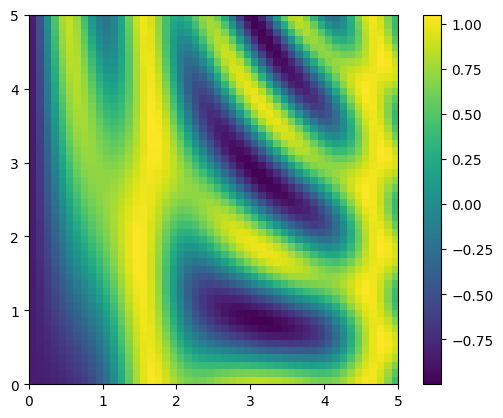

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(z, origin = 'lower', extent = [0,5,0,5], cmap = 'viridis')
plt.colorbar()

#### Fancy indexing
It means passing an array of indices to access multiple array elements at once

In [123]:
# set seed
rand = np.random.RandomState([42]) # same as --> np.random.seed(42)
# generate 10 integers within 100
x = rand.randint(100, size=10) # same as x =np.random.randint(100, size = 10)

print(x)

[29 81 87 16 94 41 39 51 80 52]


In [115]:
#access three different elements
print([x[3],x[4],x[6]])

# or you can include all the indexes in a list
x[[2,5,7]]

array([87, 41, 51])

With fancy indexing, the shape of the result reflects the shape of the index arrays
rather than the shape of the array being indexed:

In [136]:
# pass a two-dimension array of indices
# numpy.reshape(array, shape, order = 'C'), where shape is int or tuple or ints
ind1 = np.array([3,4,5,7]).reshape((2,2))

print("The index array is:")
print(ind1)

print("\nThe array being indexed is:")
print(x)

print("\nThe resulted array is:")
print(x[ind1])

The index array is:
[[3 4]
 [5 7]]

The array being indexed is:
[29 81 87 16 94 41 39 51 80 52]

The resulted array is:
[[16 94]
 [41 51]]


Fancy indexing also works in multiple dimensions. In the example below:
1. Like with standard indexing, the first index refers to the row
2. The second index refers to the column

In [137]:
# in a multi-dimension array
y = np.arange(12).reshape((3, 4))
row = np.array([0, 1, 2])
col = np.array([1, 2, 3])

print('The array being indexed:')
print(y)

# retrieve cell from matrix
print("\nThe resulted array is:")
print(y[row, col])

The array being indexed:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

The resulted array is:
[ 1  6 11]


Combined Indexing

We can combined different ways of indexing:
1. We can combine fancy and simple indices
2. We can also combine fancy indexing with slicing
3. we can combine fancy indexing with masking

All of these indexing options combined lead to a very flexible set of operations for
accessing and modifying array values.

In [252]:
y = np.arange(12).reshape((3,4))

print(y)

#combined indexing
y[2, [2, 1, 3]]

y[1:,[2, 1, 3]]

y[[2,1], 2:]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


array([10,  9, 11])

array([[ 6,  5,  7],
       [10,  9, 11]])

array([[10, 11],
       [ 6,  7]])

*Example 1*

Using fancy indexing in data science projects: select random points


In [162]:
#create a two-dimension normal distribution
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
x = rand.multivariate_normal(mean, cov, 100)
# x = np.random.normal(0, 2, (100,2))
x[:5,]
# dimension of matrix
x.shape

array([[-0.075941  , -0.52082639],
       [ 0.04168095, -0.05565961],
       [-0.12839572,  0.45257782],
       [ 1.3517075 ,  3.14806447],
       [-0.00371873,  0.14267916]])

(100, 2)

Let's draw these normally distributed points in a scatterplot.

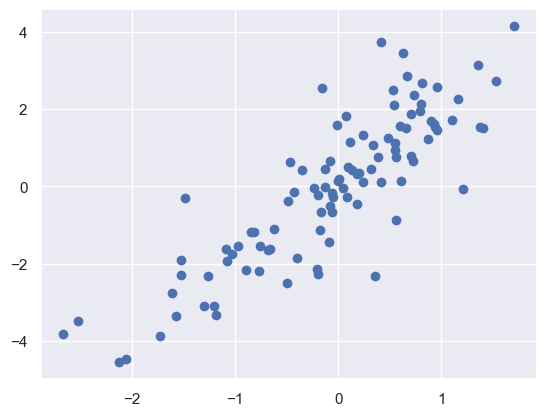

In [165]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

seaborn.set() # for plot styling

plt.scatter(x[:,0], x[:,1])

*Example 2*

Let’s use fancy indexing to select 20 random points. We’ll do this by first choosing 20
random indices with no repeats, and use these indices to select a portion of the original
array:

In [180]:
#create indices:choosing 20 random indices with no repeats: replace = False
# choice method: https://www.geeksforgeeks.org/numpy-random-choice-in-python/
np.random.seed(2023)
indices = np.random.choice(100, 20, replace = False)
print(indices)

# randomly pick 20 points from the array generated from normal dist
selection = x[indices]

print(selection[:5,])

selection.shape

[56 12 68  0 82 66 91 44 46 20 35 76 83  9 16 89 26 24  2 43]
[[-0.77055663 -2.19085628]
 [-0.35152063  0.42590182]
 [-0.05198084 -0.28361102]
 [-0.075941   -0.52082639]
 [-0.49262581 -0.38808465]]


(20, 2)

Now to see which points were selected, let’s over-plot large circles at the locations of
the selected points

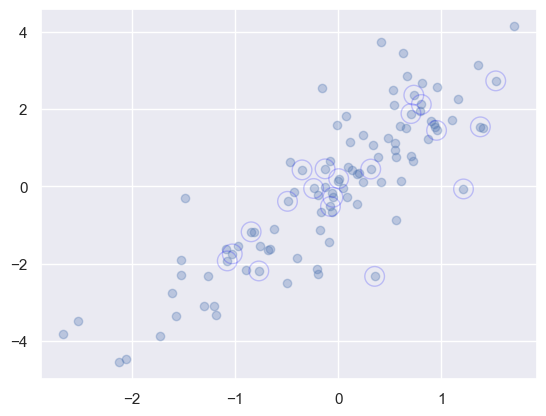

In [220]:
%matplotlib inline

# set alpha to adjust the transparency of points
plt.scatter(x[:, 0],x[:, 1], alpha = .3)
# overlap a new graph on the previous one
# plt.scatter(selection[:,0],selection[:,1], c ='blue',s = 50, alpha = 0.4)
plt.scatter(selection[:,0],selection[:,1], edgecolor = 'blue', facecolor = 'none', s = 200, alpha = 0.2)

##### Modify values with fancy indexing
Imagine we have an array of indices and we’d like to set the corresponding items in an array to some value

In [221]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [222]:
# assignment-type operator
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [223]:
# be careful with the repeated indexes
# 4 has been updated with 6
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#### Vectorized Computation Methods

Let's supplement some other vectorized computation methods.
1. Compute array with array (with broadcasting rules)
2. +, -, *, /, ...

In [225]:
array1 = np.arange(9).reshape((3,3))
array2 = np.arange(3)
array = np.arange(4)
array1
array2

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

array([0, 1, 2])

Common vectorized computation methods


Product of arrays

In [226]:
# array times array
array1 * array2

array([[ 0,  1,  4],
       [ 0,  4, 10],
       [ 0,  7, 16]])

In [229]:
# or use the np function
np.multiply(array1,array2)

array([[ 0,  1,  4],
       [ 0,  4, 10],
       [ 0,  7, 16]])

Summation of arrays

In [240]:
array1 + array2

array([[ 0,  2,  4],
       [ 3,  5,  7],
       [ 6,  8, 10]])

In [241]:
np.add(array1, array2)

array([[ 0,  2,  4],
       [ 3,  5,  7],
       [ 6,  8, 10]])

In [249]:
array1; array2

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

array([0, 1, 2])

Dot product of two arrays, which is similar to matrix multiplication in linear algebra

In [242]:
np.dot(array1, array2)

array([ 5, 14, 23])

Average of arrays

In [258]:
# calcualte the mean of 
np.mean(array1) # all elements
np.mean(array1, 0) # each column
np.mean(array1, 1) # each row

4.0

array([3., 4., 5.])

array([1., 4., 7.])

Other summary statistics for arrays:

```
np.max(array, axis = None) # or '0' for column-wise, or '1' for row-wise
np.maximum(array1, array2)
np.min(array, axis = None) # or '0' for column-wise, or '1' for row-wise
np.minimum(array1, array2)
np.median
np.cumsum
np.sqrt
np.exp
np.add
np.subtract
```

In [264]:
array1; array2
np.minimum(array1, array2)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

array([0, 1, 2])

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

### Comparisons, Masks, and Boolean Logic

- Masking comes up when you want to extract, modify, count, or otherwise manipulate values in an array based on some criterion
    - Ex., count all values greater than a certain value
    - Ex., remove all outliers that are above some threshold

- Boolean masking: most efficient way to accomplish these types of tasks

Imagine you have a series of data that represents the amount of precipitation each day
for a year in a given city. For example, here we’ll load the daily rainfall statistics for
the city of Seattle in 2014, using Pandas (we will cover it next section soon). 

To install pandas: run this in cmd (Windows) or bash (Mac) `pip install pandas`.

In [293]:
import numpy as np
import pandas as pd 

# data link: https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks_v1/data/Seattle2014.csv

# use Pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks_v1/data/Seattle2014.csv')

rainfall.head(5)

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03
0,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140101,0,0,0,72,33,12,340,310,36,40,-9999,-9999,-9999,-9999
1,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140102,41,0,0,106,61,32,190,200,94,116,-9999,-9999,-9999,-9999
2,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140103,15,0,0,89,28,26,30,50,63,72,1,-9999,-9999,-9999
3,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140104,0,0,0,78,6,27,40,40,45,58,1,-9999,-9999,-9999
4,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140105,0,0,0,83,-5,37,10,10,67,76,-9999,-9999,-9999,-9999


In [294]:
# extract PRCP column as an array
rainfall = rainfall['PRCP'].values
# transform unit from cm to inch
inches = rainfall/254 # 1/10mm -> inches
type(inches)
inches.shape

numpy.ndarray

(365,)

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <BarContainer object of 40 artists>)

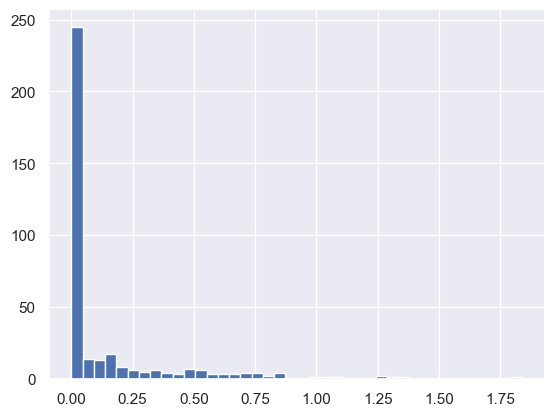

In [299]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # set plot styles
plt.hist(inches, 40, orientation='vertical')

#### Comparison Operators as ufuncs

NumPy also implements comparison operators such as < (less than) and > (greater than) as element-wise ufuncs.

In [543]:
x = np.array([1, 2, 3, 4, 5])
x < 3
x <= 3
x != 3
x == 3

array([ True,  True, False, False, False])

array([ True,  True,  True, False, False])

array([ True,  True, False,  True,  True])

array([False, False,  True, False, False])

In [544]:
# element-by-element comparison of 2 arrays
# ompound expressions
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

In [546]:
# compraison operators are implemented as ufuncs in NumPy
x < 3
np.less(x, 3)

array([ True,  True, False, False, False])

array([ True,  True, False, False, False])

| Operator | Equivalent ufunc |
|----------|------------------|
| ==       | np.equal         |
| !=       | np.not_equal     |
| <        | np.less          |
| <=       | np.less_equal    |
| >        | np.greater       |
| >=       | np.greater_equal |

These comparison operators work on any size array.

In [311]:
# initiate a random number generator
rng = np.random.RandomState(0)

# np.random.seed(0)
x = rng.randint(10, size = (3,4))
x
# compare all elements with 6
x <= 6 
# equivalent ufuncs in Numpy
np.less_equal(x, 6)

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False,  True]])

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False,  True]])

#### Working with boolean arrays

Given a Boolean array, there are a host of useful operations you can do.

- `&` np.bitwise_and
- `|` np.bitwise_or
- `^` np.bitwise_xor
- `~` np.bitwise_not

Note: Python has built-in `sum()`, `any()`, and `all()` functions. These have different syntax than the NumPy versions. So you need to use `np.sum()`, `np.any()`, and `np.all()` for these instances.

In [ ]:
# initiate an array
x = np.array([[5 0 3 3],
              [7 9 3 5],
              [2 4 7 6]])

In [312]:
# counting entries
x

# how many nonzero entries
np.count_nonzero(x)

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

11

In [316]:
# summation of all entries
np.sum(x)

# count # of entries satisfying requirements
np.sum(x == 6)

54

1

In [317]:
# summation can be done along rows or columns
# how many values less than 6 in each row
np.sum(x < 6, axis = 1)

array([4, 2, 2])

More examples with `np.any()` and `np.all()`

In [319]:
np.random.seed(1) # same as np.random.RandomState()
x = np.random.randint(1,100,(3,4))

print(x)

# are there any values greater than 8?
# return boolean
np.any(x > 8)

# are there any values in each column greater than 8 
# return boolean in an array
np.any(x > 8, axis = 0)

# are all values in each row less than 8?
# return boolean in array
np.all(x > 8, axis = 1)

[[38 13 73 10]
 [76  6 80 65]
 [17  2 77 72]]


True

array([ True,  True,  True,  True])

array([ True, False, False])

In [321]:
# what values are greater than 8?
x > 8
# index the element that are greater than 8
x[x > 8]

array([[ True,  True,  True,  True],
       [ True, False,  True,  True],
       [ True, False,  True,  True]])

array([38, 13, 73, 10, 76, 80, 65, 17, 77, 72])

*Boolean operators*

In [346]:
inches.max()

1.8385826771653544

In [358]:
# both are true -> true
# inches
inches.shape

# A and B
np.sum((inches > 0.5) & (inches < 1))
np.sum(np.bitwise_and(inches > 0.5, inches < 1))

# A or B
np.sum((inches > 0.5) | (inches < 1))
np.sum(np.bitwise_or(inches > 0.5, inches <1))

(365,)

29

29

365

365

In [366]:
# either one is true -> true
# both are false -> false
# NOT (A OR B)
np.sum(~((inches <= 0.5) | (inches >= 1))) 
np.sum(np.bitwise_not((inches <= 0.5) | (inches >= 1)))

29

29

In [371]:
# (A or B) - (A and B)
np.sum((inches > 0.5) ^ (inches < 1))
np.sum(~((inches > 0.5) & (inches < 1)))

336

336

#### Boolean array as masks
A more powerful pattern is to use Boolean arrays as masks, to select particular
subsets of the data themselves. Returning

In [621]:
# array
x

# obtain a boolean array for the condition
x < 5

# select these values from the array
x[x < 5]

array([[38, 13, 73, 10],
       [76,  6, 80, 65],
       [17,  2, 77, 72]])

array([[False, False, False, False],
       [False, False, False, False],
       [False,  True, False, False]])

array([2])

Let's go back to the precipitation data and select the summer days from 365 days. 
1. Construct a mask for rainy days
2. Construct a mask for summer days

In [381]:
# construct a mask of all rainy days
rainy = (inches > 0)

# a mask of all summer days (Jun 21st is the 172nd day in a year)
# this creates a 365x1 matrix of boolean values 
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)

print(inches[summer])

[0.         0.         0.         0.         0.07086614 0.09055118
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.01181102
 0.75984252 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01968504 0.
 0.         0.         0.         0.         0.         0.
 0.         0.01968504 0.5        0.8503937  0.         0.03937008
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.33070866 0.0511811  0.         0.11811024
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.01968504 0.01181102 0.        ]


In [385]:
# calculate median of the rain during rainy days over the year
np.median(inches[rainy])

# median of the rain in the summer days
np.median(inches[summer])

np.average(inches[rainy & summer])
np.average(inches[rainy & ~summer])

0.19488188976377951

0.0

0.2066929133858267

0.3356009726725335

#### Using the Keywords and/or Versus the Operators & / |

- `and` and `or` gauge the truth or falsehood of entire object
    - When you use `and` or `or`, it’s equivalent to asking Python to treat the object as a single Boolean entity.
    - In Python, all nonzero integers will evaluate as `True`
    
- `& `and `|` refer to bits within each object.
    - When you use `&` and `|` on integers, the expression operates on the bits of the element
    - applying the `and` or the `or` to the individual bits making up the number

In [657]:
bool(42), bool(0)

bool(42 and 0)

bool(42 or 0)

(True, False)

False

True

In [655]:
# bin() method converts a specified integer number to its binary representation
bin(42)
bin(59)

bin(42 & 59)

bin(42 | 59)

'0b101010'

'0b111011'

'0b101010'

'0b111011'

In [663]:
# in NumPy array of boolean values
# a string of bits 1 = True and 0 = False
A = np.array([1, 0, 1, 0, 1, 0], dtype = bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype = bool)
A & B
A | B

array([ True, False,  True, False,  True, False])

array([ True,  True,  True, False,  True,  True])

In [664]:
# Use and will evaluate the truth or falsehood of the entire array object
# which is not well-defined
A and B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [674]:
# when using boolean expression on given array
# use | or & rather than or or and
x = np.arange(10)
x

(x > 4) & (x < 8)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([False, False, False, False, False,  True,  True,  True, False,
       False])

### Practice 

Work with `president_heights.csv` dataset.
1. Use `df = pd.read_csv(url, index_col = 0)` to load the data into Jupyter Notebook and assign it to the object `df`. The link of the dataset is https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/president_heights.csv.

2. Extract the height column and convert data table to Numpy array using `height = np.array(df['height(cm)'])`.

3. Find mean, median, min, and max in the `height` array. 

4. Find heights greater than 165cm and less than 185cm.

In [3]:
import pandas as pd
url = 'https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/president_heights.csv'
df = pd.read_csv(url,index_col = 0)
df

,name,height(cm)
order,,
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189
4,James Madison,163
5,James Monroe,183
6,John Quincy Adams,171
7,Andrew Jackson,185
8,Martin Van Buren,168
9,William Henry Harrison,173


In [832]:
type(df)

pandas.core.frame.DataFrame

In [834]:
height = np.array(df['height(cm)'])
height

array([189, 170, 189, 163, 183, 171, 185, 168, 173, 183, 173, 173, 175,
       178, 183, 193, 178, 173, 174, 183, 183, 168, 170, 178, 182, 180,
       183, 178, 182, 188, 175, 179, 183, 193, 182, 183, 177, 185, 188,
       188, 182, 185], dtype=int64)

In [839]:
# use NumPy functions
np.average(height)
np.std(height)
np.min(height)
np.max(height)

179.73809523809524

6.931843442745892

163

193

In [835]:
#check basic statistics
print("Mean height: ", height.mean())
print("Standard deviation:", height.std())
print("Minimum height: ", height.min())
print("Maximum height: ", height.max())

Mean height:  179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:  163
Maximum height:  193


In [842]:
#find heights greater than 165cm and less than 185cm
height[(height > 165) & (height < 185)]

array([170, 183, 171, 168, 173, 183, 173, 173, 175, 178, 183, 178, 173,
       174, 183, 183, 168, 170, 178, 182, 180, 183, 178, 182, 175, 179,
       183, 182, 183, 177, 182], dtype=int64)

### Sorting arrays

There are some algorithms related to sorting values in NumPy arrays.

In [843]:
#sorting
np.random.seed(1)
x = np.random.randint(1,100,(3,4))

print(x)
#np.sort()
#sort arrays without modifying the input

# sort row
np.sort(x, axis = 1)
# sort column
np.sort(x, axis = 0)

#np.argsort(): returns the indices of the sorted elements
np.argsort(x, axis = 1)
np.argsort(x, axis = 0)

type(np.argsort(x))

[[38 13 73 10]
 [76  6 80 65]
 [17  2 77 72]]


array([[10, 13, 38, 73],
       [ 6, 65, 76, 80],
       [ 2, 17, 72, 77]])

array([[17,  2, 73, 10],
       [38,  6, 77, 65],
       [76, 13, 80, 72]])

array([[3, 1, 0, 2],
       [1, 3, 0, 2],
       [1, 0, 3, 2]], dtype=int64)

array([[2, 2, 0, 0],
       [0, 1, 2, 1],
       [1, 0, 1, 2]], dtype=int64)

numpy.ndarray

In [694]:
np.sort?

In [702]:
x = np.array([2, 1, 4, 3, 5])
x[2 + np.argmin(x[2:])]

3

### Numpy structured arrays

Let's take a look at NumPy’s structured arrays and record arrays, which provide efficient storage for compound, heterogeneous data.

In [9]:
import numpy as np

np.random.randint(1, 20, 20)

array([16, 14,  3, 17,  8, 19, 15,  7,  9, 11, 16, 12, 17,  3, 15, 18,  4,
        7,  5, 17])

In [706]:
#Numpy structured arrays

name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

# we used to create a simple array
np.zeros(4, dtype = int)

# Use a compound data type for structured arrays
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),
'formats':('U10', 'int', 'float')})

print(data.dtype)
# U10: Unicode string of maximum length 10
# i4: 4-byte (i.e., 32 bit) integer,
# f8: 8-byte (i.e., 64 bit) float

data

array([0, 0, 0, 0])

[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]


array([('', 0, 0.), ('', 0, 0.), ('', 0, 0.), ('', 0, 0.)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [844]:
data['name'] = name
data['age'] = age
data['weight'] = weight

data

type(data)

data.shape

array([('Alice', 25, 55. ), ('Bob', 45, 85.5), ('Cathy', 37, 68. ),
       ('Doug', 19, 61.5)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

numpy.ndarray

(4,)

In [847]:
# get first row
data[0]

# get name from last row
data[0]['weight']

('Alice', 25, 55.)

55.0

In [722]:
# get rows where age < 30
data[data['age'] < 30]

# get names where age < 30
data['name'][data['age'] < 30]

array([('Alice', 25, 55. ), ('Doug', 19, 61.5)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

array(['Alice', 'Doug'], dtype='<U10')

#### Create structured arrays

In [723]:
# dictionary method
np.dtype({
    'names':('name', 'age', 'weight'),
    'formats':('U10', 'i4', 'f8')
})

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [724]:
# specified with Python types or NumPy dtypes
np.dtype({
    'names':('name', 'age', 'weight'),
    'formats':((np.str_,10), int, np.float32)
})

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f4')])

In [726]:
# specified as a list of tuples
np.dtype([('name', 'S10'), ('age','i4'),('weight','f8')])

dtype([('name', 'S10'), ('age', '<i4'), ('weight', '<f8')])

In [727]:
# specified without names
np.dtype('S10, i4, f8')

dtype([('f0', 'S10'), ('f1', '<i4'), ('f2', '<f8')])

In [22]:
# ex.,
# create structured array with 2 characteristics
# 1. id (int) ; 2. age (float)
tp = np.dtype([('id', 'i8'), ('age', 'f8')])
# create structured array with only 1 element
x = np.zeros(1, dtype = tp)

x['id'] = [18]
x['age'] = [24.5]
x

array([(18, 24.5)], dtype=[('id', '<i8'), ('age', '<f8')])

In [30]:
print(x['id'][0])
print(x[0]['id'])

18
18


In [49]:
# exercise
# create a structured array for store employees
# we have 4 people in the store, each person has 4 characteristics
# 1. name 'U10' 2. cellphone 'i8' 3. age 'f8' 4. working title 'S10'
name = ['Tom','Mary', 'Caren', 'Jack']
cellphone = [917888888, 917555555, 917444444, 917333333]
age = [19,20,49,32]
title = ['staff', 'staff', 'manager', 'staff']
employee_type = np.dtype([('name', 'U10'), ('cellphone', 'i8'), ('age','f8'), ('title','U10')])
employee = np.zeros(4, dtype = employee_type)

employee['name'] = name
employee['cellphone'] = cellphone
employee['age'] = age
employee['title'] = title

# title of the first employee
employee['title'][0]

'staff'